In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn import datasets

(150, 4)
(150, 2)


<ipython-input-21-298da1049953>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("viridis",3))


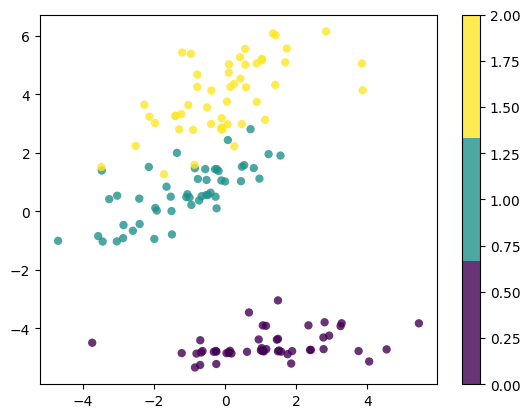

In [21]:
class PCA:

  def __init__(self, n_components):
    self.n_components =  n_components
    self.components = None
    self.mean = None

  def fit(self, x):

    self.mean = np.mean(x, axis=0)
    x = x - self.mean

    cov = np.cov(x.T)

    eigenvectors, eigenvalues = np.linalg.eig(cov)

    eigenvectors = eigenvectors.T

    idex = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idex]
    eigenvectors = eigenvectors[idex]

    self.components = eigenvectors[:self.n_components]


  def transform(self, x):
    x=x-self.mean
    return np.dot(x, self.components.T)

(150, 4)
(150, 2)


<ipython-input-22-8da818628912>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("viridis",3))


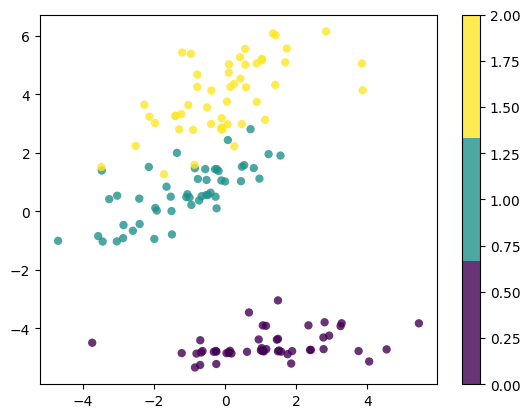

In [22]:
if __name__=="__main__":

  data = datasets.load_iris()
  x=data.data
  y=data.target

  pca = PCA(2)
  pca.fit(x)

  x_projected = pca.transform(x)

  print(x.shape)
  print(x_projected.shape)

  x1= x_projected[:,0]
  x2 = x_projected[:,1]


  plt.scatter(x1,
              x2,
              c=y,
              edgecolor= "none",
              alpha = 0.8,
              cmap=plt.cm.get_cmap("viridis",3))

  plt.colorbar()
  plt.show()